## Домашнее задание №1: визуализация, k-NN регрессия, кросс-валидация. 
### [ИАД-3, HW1] Якименко Александра

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### 1. (0.25 балла) Откройте файл bike_sharing.csv, запишите в датафрейм df и выведите первые пять строк датафрейма.

In [3]:
df = pd.read_csv("bike_sharing.csv", sep = ",", index_col = 0)

In [4]:
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,34.4167,36.3625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,36.3478,35.3739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,19.6364,18.9405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,20.0000,21.2122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,22.6957,22.9270,0.436957,0.186900,82,1518,1600



#### 2. (1 балл) Постройте график среднего числа арендованных байков (cnt) по каждому месяцу. Не забудьте подписать оси координат. Убедитесь, что в летние месяцы велосипеды в прокат берут чаще.

In [5]:
average = df.groupby('mnth')['cnt'].mean()

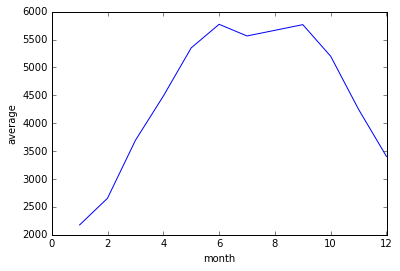

In [6]:
plt.plot(average)
plt.xlabel('month')
plt.ylabel('average')

из графика видно, что где-то с 6 по 9 месяц пик аренды велосипедов -> теплые летние месяцы

#### 3. (0.5 балла) Постройте диаграмму рассеяния (scatter plot) с осями cnt и atemp, где точки — это объекты. Какой логичный вывод можно сделать по этому графику?

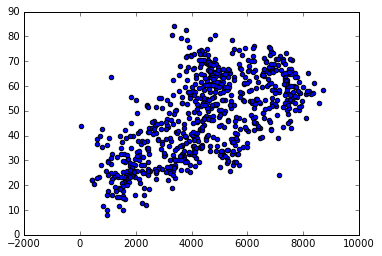

In [7]:
plt.scatter(df["cnt"], df["atemp"])

можно сказать, что в целом, чем теплее, тем больше великов берут

#### 4. (0.5 балла) Преобразуйте небинарные категориальные признаки с помощью one-hot кодирования. Сделать это можно с помощью функции pd.get_dummies, указав нужные столбцы в параметре columns. Сколько признаков получилось после кодирования? И какой категориальный признак породил больше всего бинарных?

In [8]:
df = pd.get_dummies(df, columns=['season','mnth','weekday','weathersit'])
df.head(5)

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,0,0,0,34.4167,36.3625,0.805833,0.160446,331,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,2011-01-02,0,0,0,36.3478,35.3739,0.696087,0.248539,131,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,2011-01-03,0,0,1,19.6364,18.9405,0.437273,0.248309,120,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2011-01-04,0,0,1,20.0000,21.2122,0.590435,0.160296,108,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2011-01-05,0,0,1,22.6957,22.9270,0.436957,0.186900,82,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Теперь есть 
- 4 признака от season; 
- 12 от mnth; 
- 7 оот weekday; 
- 3 от weathersit

То есть больше всего бинарных признаков породил месяц mnth

#### 5. (0.25 балла) Удалите столбцы instant, dteday, casual и registered. Предположите, почему мы удаляем эти признаки.

In [9]:
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
df.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,34.4167,36.3625,0.805833,0.160446,985,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0,0,36.3478,35.3739,0.696087,0.248539,801,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,19.6364,18.9405,0.437273,0.248309,1349,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,20.0000,21.2122,0.590435,0.160296,1562,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,1,22.6957,22.9270,0.436957,0.186900,1600,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


- instant номер записи, не влияет на результат и не является признаком
- дата тоже по сути ни на что не влияет, это просто номер дня в месяце
- casual и registered уже есть общее число сдаваемых на прокат велосипедов cnt

#### 6. (0.5 балла) Далее нашей целевой переменной будет количество арендованных велосипедов (cnt). 

Поэтому запишите cnt в переменную df_ans и удалите из df. Затем в помощью функции train_test_split из sklearn.model_selection разделите выборку на обучающую и контрольную в отношении 7 к 3, создав переменные X_train, X_test, y_train, y_test.

Замечание 1: установите random_seed, чтобы генератор псевдослучайных чисел работал всегда одинаково.

Замечание 2: если в sklearn.model_selection нет функции train_test_split, обновите scikit-learn.

In [10]:
df_ans = df['cnt']
del df['cnt']

In [11]:
df.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,34.4167,36.3625,0.805833,0.160446,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0,0,36.3478,35.3739,0.696087,0.248539,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,19.6364,18.9405,0.437273,0.248309,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,20.0000,21.2122,0.590435,0.160296,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,1,22.6957,22.9270,0.436957,0.186900,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df, df_ans, test_size=0.3, random_state=500)


#### 7. (1 балл) Обучите алгоритм пяти ближайших соседей с евклидовой метрикой и оцените MAE на контрольной выборке.

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
neigh = KNeighborsRegressor(metric = 'euclidean')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print('MAE = ',MAE)

MAE =  1067.17727273


#### 8. (0.5 балла) Постройте диаграмму рассеяния (scatter plot), 
по одной оси отметив настоящее число аренд велосипедов, а по другой — предсказанное алгоритмом. 

Дополнительно на этом графике постройте прямую . Чему соотстветствует отклонение от этой прямой?

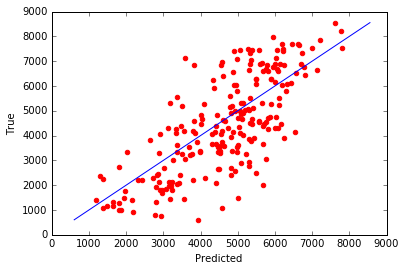

In [17]:
plt.scatter(y_pred, y_test, color = 'r')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.plot([y_test.min(), y_test.max()], [[y_test.min()], [y_test.max()]])

Отклонение от прямой показывает насколько предсказание отличается от истиного значения

#### 9. (1 балл) Отмасштабируйте признаки, чтобы они принимали значения на [0;1].

Это можно сделать собственноручно с помощью операций pandas.

Иначе — можно использовать MinMaxScaler из sklearn.preprocessing — класс с методами fit и transform. Для этого:

- либо соедините X_train и X_test обратно в единый датафрейм, отмасштабируйте и разъедините обратно,
- либо отмасштабируйте df (без ответов) и разделите на обучающую и контрольную выборку, используя тот же random_seed.

На выходе метода transform получится numpy-массив, который нужно будет превратить обратно в датафрейм.

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
num_ar = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(num_ar)
X_train, X_test, y_train, y_test = train_test_split(df, df_ans, test_size = 0.3, random_state = 500)

Я слишком глупая, поэтому заюзала третий вариант.

#### 10. (0.5 балла) Вновь обучите алгоритм пяти ближайших соседей с евклидовой метрикой и оцените MAE на контрольной выборке. 
Почему качество поменялось?

In [20]:
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
MAE2 = mean_absolute_error(y_test, y_pred)
print('new MAE = ', MAE2)

new MAE =  897.338181818


Качество улучшилось т.к. алгоритм чувствителен к масштабированию данных. То есть, теперь вклад каждого признака "измеряется" в одинаковых рамках, и признаки с большими значениями не подавляют остальные.

#### 11. (1.25 балла) Используя класс KFold из sklearn.model_selection установите с помощью кросс-валидации на пяти фолдах, какой параметр weights лучше с точки зрения mean absolute error.

In [21]:
from sklearn.model_selection import KFold

In [22]:
kf = KFold( n_splits = 5)
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])
neigh_uniform = KNeighborsRegressor(weights = 'uniform')
neigh_distance = KNeighborsRegressor(weights = 'distance')
y_pred = np.zeros(y.shape)

for train, test in kf.split(X):
    neigh_uniform.fit(X[train], y[train])
    y_pred[test] = neigh_uniform.predict(X[test])

print("uniform MSE =", mean_absolute_error(y, y_pred))

for train, test in kf.split(X):
    neigh_distance.fit(X[train], y[train])
    y_pred[test] = neigh_distance.predict(X[test])
    
print("distance MSE =", mean_absolute_error(y, y_pred))

uniform MSE = 902.374829001
distance MSE = 784.438709883


Параметр distance лучше, ибо MAE меньше

#### 12. (2.5 балла) С помощью GridSearchCV из sklearn.model_selection на пяти фолдах выберите лучшее значение  от 1 до 50. 

Постройте график MAE на кросс-валидации в зависимости от k.

Замечание: Передать нужную метрику качества для GridSearchCV можно через параметр scoring, но не всё так просто. Из метрики качества нужно сделать «scorer» c помощью функции sklearn.metrics.make_scorer, не забыв указать нужное значение greater_is_better.

это я для себя

score_func : callable,
Score function (or loss function) with signature score_func(y, y_pred, **kwargs).

cv : int, cross-validation generator or an iterable, optional
 Possible inputs for cv are:

- integer, to specify the number of folds in a (Stratified)KFold,
- An object to be used as a cross-validation generator.

example:

from sklearn.grid_search import GridSearchCV

n_neighbors_array = [1, 3, 5, 7, 10, 15]

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})

grid.fit(X_train, y_train)


надо минимизовать -> false

In [23]:
def score_func(y, y_pred, **kwargs):
    return mean_absolute_error(y, y_pred)

from sklearn.metrics import make_scorer
scorer = make_scorer(score_func, greater_is_better = False)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:

clf = GridSearchCV(KNeighborsRegressor(), scoring = scorer, cv = kf, param_grid = {'weights':['distance'], 'n_neighbors':range(1,51)})

In [29]:
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 51), 'weights': ['distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(score_func, greater_is_better=False), verbose=0)

best_params_ : dict
Parameter setting that gave the best results on the hold out data.

In [30]:
print(clf.best_params_)

{'n_neighbors': 7, 'weights': 'distance'}


In [31]:
best_n_neighbors = clf.best_estimator_.n_neighbors
print (best_n_neighbors)

7


In [37]:
err = clf.cv_results_['mean_test_score']
print(err)

[-1043.91585127  -917.37384132  -844.55917542  -807.80972393  -786.70494391
  -764.71898903  -754.65835059  -760.03477494  -766.97771453  -772.00784583
  -777.29023941  -783.54233044  -798.19626169  -810.3662963   -825.80324123
  -835.56593267  -843.11006904  -851.24313935  -860.43462886  -864.28440784
  -873.7463292   -877.95085418  -884.5985286   -886.82309815  -886.35673897
  -886.84471557  -886.26970565  -886.51655451  -888.16226804  -889.58193741
  -890.21137531  -889.64155202  -889.98560396  -887.79926431  -883.57263766
  -883.49433638  -883.45491664  -881.42130809  -879.59300838  -879.06214848
  -878.88844833  -878.69576271  -878.81867947  -878.16849708  -878.21660214
  -878.55923472  -878.35336663  -878.24676655  -877.52852732  -879.69735102]


#### лучшее значение к=7

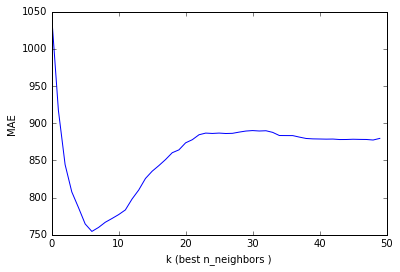

In [38]:
plt.plot(-err)
plt.xlabel('k (best n_neighbors )')
plt.ylabel('MAE')

#### 13. (0.25 балла) Посчитайте качество итоговой модели на контрольной выборке.

In [39]:
neigh_result = KNeighborsRegressor(weights = 'distance', n_neighbors = best_n_neighbors)

In [40]:
neigh_result.fit(X_train, y_train)
y_pred = neigh_result.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('result MAE = ', result)

result MAE =  760.872127236
